In [1]:
# import os
# os.environ['DATA_READER_VENDOR'] = 'tiingo'
%pylab inline
from requests import post
from app.analysis import Quote
def screen_securities(after=None):
    query = 'query screen($limit:[SecurityLimitOptionInput!]!,$after:String){viewer{screenSecurities(filterTypes:EQUITY,limit:$limit,sort:{type:MARKET_CAP,direction:DESC},first:100,after:$after){pageInfo{hasNextPage,endCursor},edges{node{symbol}}}}}'
    variables = {'limit':[{'type':'MARKET_CAP','min':32000000000,'inclusive':True}],'after':after}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    cursor = r['data']['viewer']['screenSecurities']['pageInfo']['endCursor']
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenSecurities']['edges']], cursor
s1, after = screen_securities()
s2, after = screen_securities(after)
symbols = s1 + s2 + screen_securities(after)[0]
print(len(symbols))
quote = Quote(symbols, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
291
from 2019-05-23 to 2019-07-12 - 291


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

268


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
AGN,30,4.766378,12.537192,0.377014,20.146345,16.161976
MU,30,4.288748,7.097738,0.598651,31.608512,7.183739
TSLA,30,3.785794,5.083035,0.736983,25.367024,8.450562
NEM,30,3.561048,2.951300,1.193158,25.098842,2.102607
SQ,30,3.474539,5.243491,0.655071,29.066665,7.900335
AMD,30,3.307728,7.257028,0.450328,25.986337,13.150764
PSX,30,3.030589,2.424492,1.233622,21.952116,3.084984
DE,30,2.788502,3.109791,0.883924,21.733751,3.194465
BBD,30,2.778954,3.807768,0.719390,20.185194,4.374995


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted ET 0.695 -0.481
evicted BA 0.685 -0.460
evicted BIIB 0.651 -0.310
evicted ILMN 0.655 -0.390
evicted INFY 0.512 -0.428
evicted AMOV 0.630 -0.422
evicted RELX 0.589 -0.347
evicted LFC 0.633 -0.369
evicted EPD 0.601 -0.413
evicted CI 0.700 -0.414
evicted EL 0.679 -0.113
evicted CTSH 0.604 -0.310
evicted EQIX 0.699 -0.406
evicted C 0.699 -0.325
evicted NVDA 0.690 -0.339
evicted QCOM 0.682 -0.225
evicted DUK 0.489 -0.382
evicted ATVI 0.438 -0.096
evicted RIO 0.347 -0.388
evicted TSLA 0.461 -0.360
evicted UBER 0.262 -0.382
evicted AMD 0.329 -0.288


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


retry backlogs ['TMUS', 'HUM', 'KHC', 'EC', 'GILD', 'MNST', 'INTU', 'FDX', 'HMC', 'VOD', 'MAR', 'T', 'SNY', 'TAK', 'UBS', 'ORAN', 'DD', 'ING', 'AAPL', 'DOW', 'MU', 'PFE', 'BTI', 'UTX', 'BLK', 'EBAY', 'AMZN', 'AFL', 'AMGN', 'PEP', 'MRK', 'MDLZ', 'FMX', 'LIN', 'BAX', 'ISRG', 'TEF', 'CVX', 'STZ', 'GM', 'WBA', 'UPS', 'TM', 'PBR-A', 'BCS', 'GSK', 'WBK', 'ALL', 'CMCSA', 'MFG', 'SPGI', 'ADI', 'AZN', 'GE', 'NVO', 'CHTR', 'INTC', 'VLO', 'CNQ', 'PHG', 'ADP', 'GD', 'MPC', 'NOC', 'EXC', 'ZTS', 'EMR', 'BKNG', 'ITW', 'AMX', 'TXN', 'MSFT', 'AVGO', 'TSM', 'DHR', 'ABB', 'MA', 'CME', 'NGG', 'AXP', 'V', 'MET', 'MMM', 'ABT', 'DE', 'NOW', 'ADSK', 'ITUB', 'SAP', 'DAL', 'KMB', 'APD', 'CRM', 'BX', 'RDS-A', 'WMB', 'XOM', 'BAM', 'PRU', 'CHA', 'CHU', 'HON', 'LOW', 'CHL', 'HSBC', 'NVS', 'CEO', 'MDT', 'COP', 'EOG', 'E', 'VFC', 'DIS', 'IBM', 'PLD', 'TJX', 'ABEV', 'LMT', 'ROST', 'D', 'LVS', 'TRV', 'TMO', 'CM', 'ETN', 'YUM', 'SYK', 'SMFG', 'RDS-B', 'PBR', 'BNS', 'SHW', 'CAT', 'UN', 'KMI', 'WELL', 'CSCO', 'SQ', 'GOOG'

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,1.831247,0.443300,1.047393,1.616274,1.772794,2.143806,2.917877,4.041430,13.219801,0.692492
NEM,30.0,3.561048,2.951300,-1.378769,1.333269,2.624669,5.359002,10.484451,1.193158,25.098842,2.102607
MCD,30.0,1.319807,1.175264,-0.501729,0.371222,1.207010,2.150127,4.038130,1.089222,7.673179,2.034258
BBD,30.0,2.778954,3.807768,-4.175362,0.419090,2.946306,4.853748,11.071861,0.719390,20.185194,4.374995
JCI,30.0,1.352935,1.831358,-1.719348,-0.551485,1.433705,2.942656,4.679410,0.717092,7.878865,3.004719
VALE,30.0,1.842105,2.944450,-4.091893,-0.510815,2.010186,3.891277,7.182766,0.612142,17.048348,5.814791
CVS,30.0,1.072045,1.915773,-2.566926,-0.642219,1.258052,2.506702,5.018117,0.538875,9.016856,3.434489
FB,30.0,1.737747,4.888340,-9.339448,0.121090,3.239821,5.328433,8.116913,0.347370,13.269199,10.938096


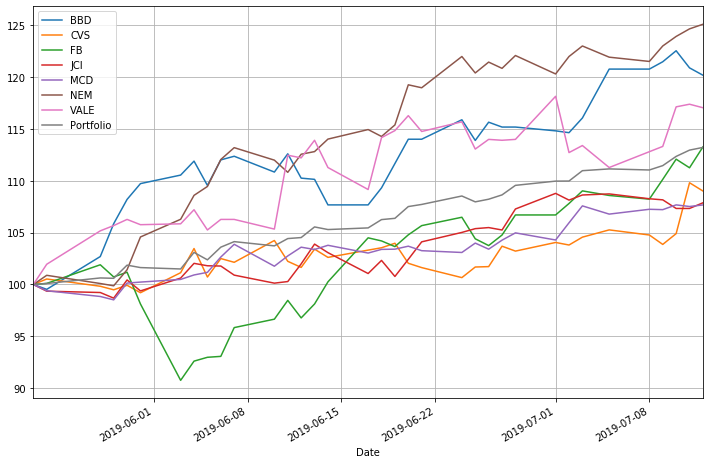

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(min_percent=.05, max_count=10, backlogs_pos_threshold=.7, _lambda=2)
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(min_percent=.05, max_count=10, _lambda=2))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)